In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
from sklearn.datasets import make_circles
make_circles

<function sklearn.datasets._samples_generator.make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)>

In [4]:
X, y = make_circles(n_samples=5000, factor=0.4)
print(X.shape, y.shape)

(5000, 2) (5000,)


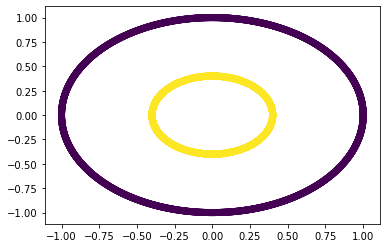

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Explore dataset 

In [8]:
np.unique(y)

array([0, 1], dtype=int64)

In [9]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([2500, 2500], dtype=int64))

keras 


In [12]:
from keras.utils import np_utils
Y = np_utils.to_categorical(y)
print(Y.shape)

(5000, 2)


In [13]:
y[:5]  #before one hot encoded

array([0, 1, 0, 1, 0], dtype=int64)

In [14]:
Y[:5]  #after one hot encoded 

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

Syquential model

In [33]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,y)
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

(3750, 2) (3750,)
(1250, 2) (1250,)


now creating Neural Network 

In [17]:
from keras.layers import Dense, Activation

In [19]:
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(Dense(5, input_shape=(2,)))
model.add(Activation('relu'))


model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 12        
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


model Compilation 

In [30]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             matrics = ["accuracy"])

In [32]:
model.fit(X_train, Y_train,
         batch_size=16 , #poer of 2
         nb_epoch=20, #20 times epoch 
         verbose=2,
         validation_data=(X_test, Y_test))


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


ValueError: Error when checking target: expected activation_4 to have shape (2,) but got array with shape (1,)